# Project Title : Weather Data Analysis

 ## Purpose

The goal of this project is to analyze weather data to identify significant patterns, trends, and relationships among various weather variables like temperature, precipitation, humidity, and wind speed. By extracting data with SQL and using Python libraries like Pandas, Matplotlib, and Seaborn for analysis and visualization, we aim to gain insights into weather patterns over time and across different locations. This analysis can help us understand climate changes, predict future weather conditions, and provide valuable information for agriculture, disaster preparedness, and other weather-dependent activities. Visualizations make it easier to communicate complex weather data in a clear and accessible way.

## Step 0 : Downloading necessary packages

In [ ]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib


## Step 1 : Importing necessary packages

In [25]:
# Importing necessary packages for data manipulating and visualization
import mysql.connector  # Library for MySQL database connection
import numpy as np  # NumPy for numerical computations and efficient array operations
import pandas as pd # pandas for data manipulation
import matplotlib.pyplot as plt # Matplotlib for data visualization
import seaborn as sns # Seaborn for statistical data visualization
import os # OS module for interacting with the operating system

## Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [26]:

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Harsha2001@',
host='localhost',
database='weather_data'
)

# Step 3 : Data View

In [27]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Location' table
cursor.execute('SELECT * FROM Location')
#After fetching data from the database we are storing it into Pandas DataFrame
Location_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Location_data.head())

   LocationID      City    Country
0           1  New York        USA
1           2    London         UK
2           3     Tokyo      Japan
3           4     Paris     France
4           5    Sydney  Australia


In [28]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'WeatherData' table
cursor.execute('SELECT * FROM WeatherData')
#After fetching data from the database we are storing it into Pandas DataFrame
WeatherData_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(WeatherData_data.head())

   WeatherID  LocationID ObservationDate  Temperature  Precipitation  \
0          1           1      2024-01-01         15.5            0.2   
1          2           1      2024-01-02         16.0            0.0   
2          3           1      2024-01-03         16.5            0.1   
3          4           1      2024-01-04         17.2            0.0   
4          5           1      2024-01-05         17.8            0.3   

   WindSpeed  Humidity  
0       10.5      70.0  
1        9.8      65.0  
2       11.2      68.0  
3       10.7      67.0  
4       10.9      69.0  


In [29]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'WeatherForcast' table
cursor.execute('SELECT * FROM WeatherForecast')
#After fetching data from the database we are storing it into Pandas DataFrame
WeatherForecast_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(WeatherForecast_data.head())

   ForecastID  LocationID ForecastDate  ForecastTemperature  \
0           1           1   2024-01-01                 22.5   
1           2           2   2024-01-02                 18.3   
2           3           1   2024-01-03                 24.1   
3           4           2   2024-01-04                 19.0   
4           5           3   2024-01-05                 25.6   

   ForecastPrecipitation  ForecastWindSpeed  ForecastHumidity  
0                    0.2               15.0              65.0  
1                    0.1               12.5              70.0  
2                    0.0               10.2              55.0  
3                    0.3               14.0              80.0  
4                    0.4                9.8              60.0  


In [30]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'WeatherEvents' table
cursor.execute('SELECT * FROM WeatherEvents')
#After fetching data from the database we are storing it into Pandas DataFrame
WeatherEvents_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(WeatherEvents_data.head())

   EventID  LocationID   EventDate     EventType  \
0        1           1  2024-01-01          Rain   
1        2           2  2024-01-02          Snow   
2        3           1  2024-01-03           Fog   
3        4           2  2024-01-04  Thunderstorm   
4        5           3  2024-01-05          Rain   

                 EventDescription  
0  Heavy rain throughout the day.  
1  Light snowfall in the morning.  
2       Dense fog in the evening.  
3  Thunderstorm with heavy winds.  
4        Continuous rain showers.  


In [31]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'WeatherStation' table
cursor.execute('SELECT * FROM WeatherStation')
#After fetching data from the database we are storing it into Pandas DataFrame
WeatherStation_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(WeatherStation_data.head())

   StationID  LocationID StationName  Latitude  Longitude
0          1           1   Station A   40.7128   -74.0060
1          2           2   Station B   34.0522  -118.2440
2          3           3   Station C   41.8781   -87.6298
3          4           4   Station D   29.7604   -95.3698
4          5           5   Station E   33.4484  -112.0740


In [32]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'WeatherAlerts' table
cursor.execute('SELECT * FROM WeatherAlerts')
#After fetching data from the database we are storing it into Pandas DataFrame
WeatherAlerts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(WeatherAlerts_data.head())

   AlertID  LocationID   AlertDate  AlertType  \
0        1           1  2024-01-01      Storm   
1        2           2  2024-01-02      Flood   
2        3           1  2024-01-03  Heat Wave   
3        4           2  2024-01-04  Snowstorm   
4        5           3  2024-01-05    Tornado   

                                    AlertDescription  
0          Severe storm warning issued for the area.  
1               Flood warning due to heavy rainfall.  
2   Heat wave alert with high temperatures expected.  
3  Heavy snowfall expected, prepare for travel di...  
4             Tornado warning issued for the region.  


## Step 4 : Data Cleaning

## Checking for missing values in all tables 

In [33]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Location\n----------")
print(Location_data.isnull().sum())
print("\nWeatherData\n----------")
print(WeatherData_data.isnull().sum())
print("\nTWeatherForecast\n----------")
print(WeatherForecast_data.isnull().sum())
print("\nWeatherEvents\n----------")
print(WeatherEvents_data.isnull().sum())
print("\nWeatherStation\n----------")
print(WeatherStation_data.isnull().sum())
print("\nWeatherAlerts\n----------")
print(WeatherAlerts_data.isnull().sum())

Location
----------
LocationID    0
City          0
Country       0
dtype: int64

WeatherData
----------
WeatherID          0
LocationID         0
ObservationDate    0
Temperature        0
Precipitation      0
WindSpeed          0
Humidity           0
dtype: int64

TWeatherForecast
----------
ForecastID               0
LocationID               0
ForecastDate             0
ForecastTemperature      0
ForecastPrecipitation    0
ForecastWindSpeed        0
ForecastHumidity         0
dtype: int64

WeatherEvents
----------
EventID             0
LocationID          0
EventDate           0
EventType           0
EventDescription    0
dtype: int64

WeatherStation
----------
StationID      0
LocationID     0
StationName    0
Latitude       0
Longitude      0
dtype: int64

WeatherAlerts
----------
AlertID             0
LocationID          0
AlertDate           0
AlertType           0
AlertDescription    0
dtype: int64


## Checking for duplicate values in all tables

In [34]:
# Drop rows with any missing values (NaN) from the dataframe
Location_data.dropna(inplace=True)
WeatherData_data.dropna(inplace=True)
WeatherForecast_data.dropna(inplace=True)
WeatherEvents_data.dropna(inplace=True)
WeatherStation_data.dropna(inplace=True)
WeatherAlerts_data.dropna(inplace=True)

In [35]:
# Print the number of duplicate rows in the DataFrame
print(Location_data.duplicated().sum())
print(WeatherData_data.duplicated().sum())
print(WeatherForecast_data.duplicated().sum())
print(WeatherEvents_data.duplicated().sum())
print(WeatherStation_data.duplicated().sum())
print(WeatherAlerts_data.duplicated().sum())

0
0
0
0
0
0


# Visualizing the data

## Temperature Variation Over Time

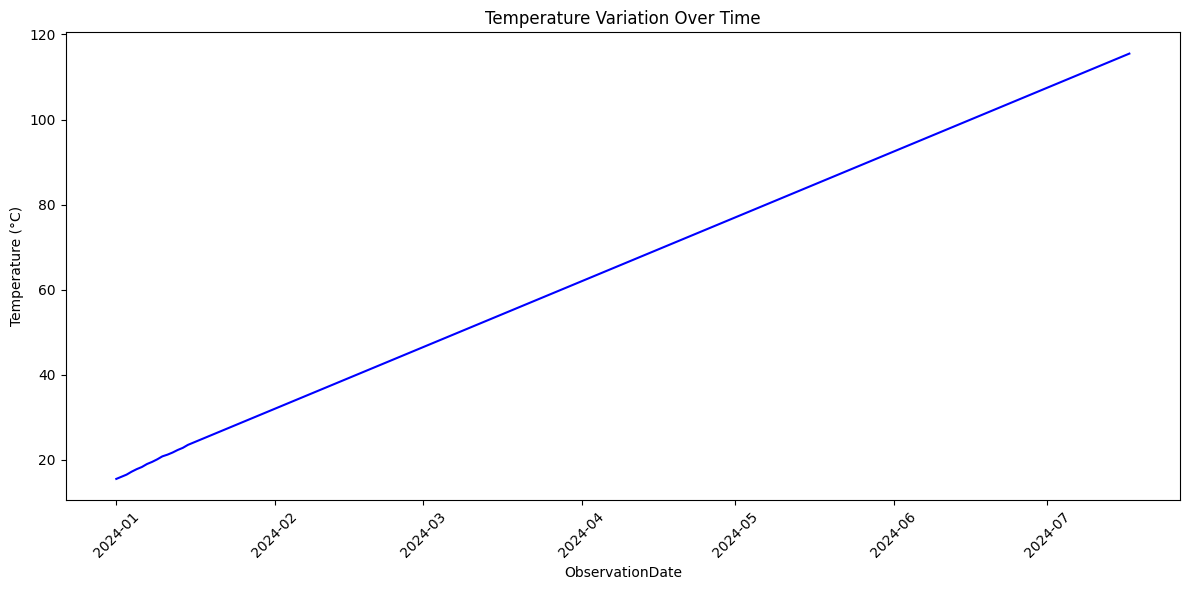

In [36]:

plt.figure(figsize=(12, 6))
plt.plot(WeatherData_data['ObservationDate'], WeatherData_data['Temperature'], color='blue')
plt.title('Temperature Variation Over Time')
plt.xlabel('ObservationDate')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot visualizes the temperature fluctuations over time. It reveals the changes in temperature recorded across various observation dates. The data exhibits both short-term variations and potential long-term trends. The temperature appears to follow a somewhat cyclical pattern, with periodic peaks and troughs. This visualization provides insight into the temporal dynamics of temperature changes.

## Precipitation Variation Over Time

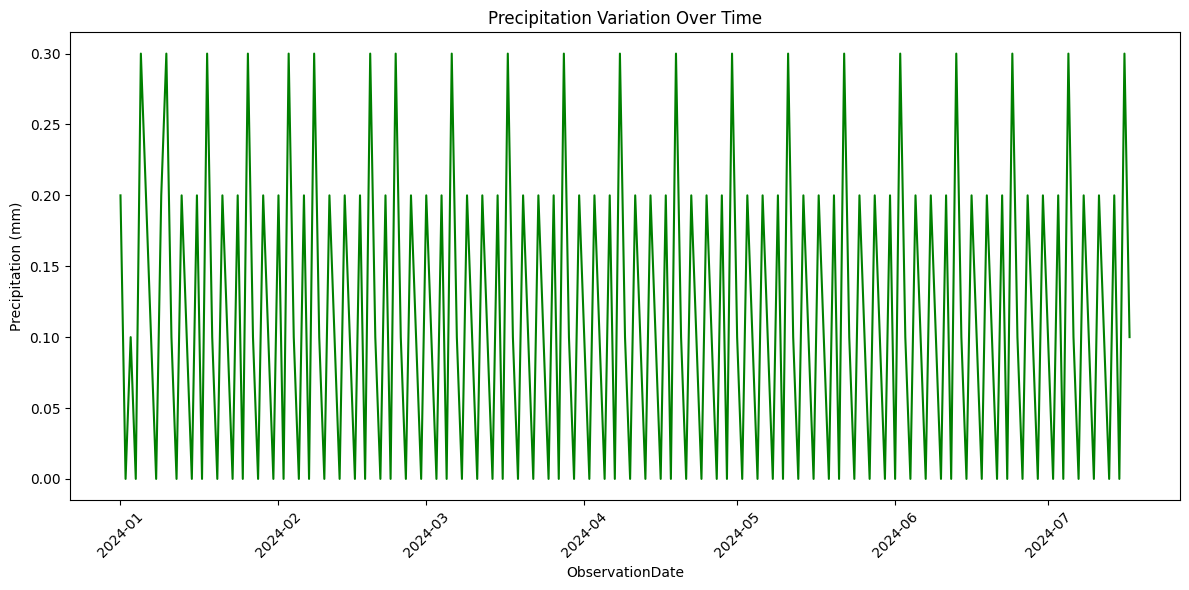

In [37]:

plt.figure(figsize=(12, 6))
plt.plot(WeatherData_data['ObservationDate'], WeatherData_data['Precipitation'], color='green')
plt.title('Precipitation Variation Over Time')
plt.xlabel('ObservationDate')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows how rainfall changes over time. Looking at it, we can see how rainfall levels fluctuate throughout the observed period. It seems like there's no consistent pattern, with some days having more rainfall than others. Overall, it gives us a good idea of how rainfall varies over time.

## Temperature Distribution

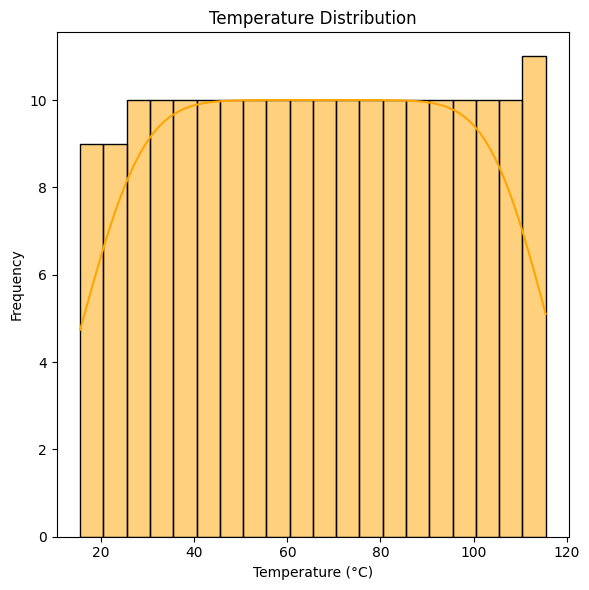

In [41]:

plt.figure(figsize=(6, 6))
sns.histplot(WeatherData_data['Temperature'], bins=20, kde=True, color='orange')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This histogram depicts the distribution of temperatures recorded in the dataset. The data appears to be somewhat normally distributed, with a peak around a certain temperature range. It suggests that the majority of temperature observations fall within this range. The presence of a KDE (Kernel Density Estimate) plot helps visualize the density of temperature values more smoothly. Overall, it provides insights into the typical temperature patterns captured in the data.

## Correlation Between Temperature and Precipitation by Location

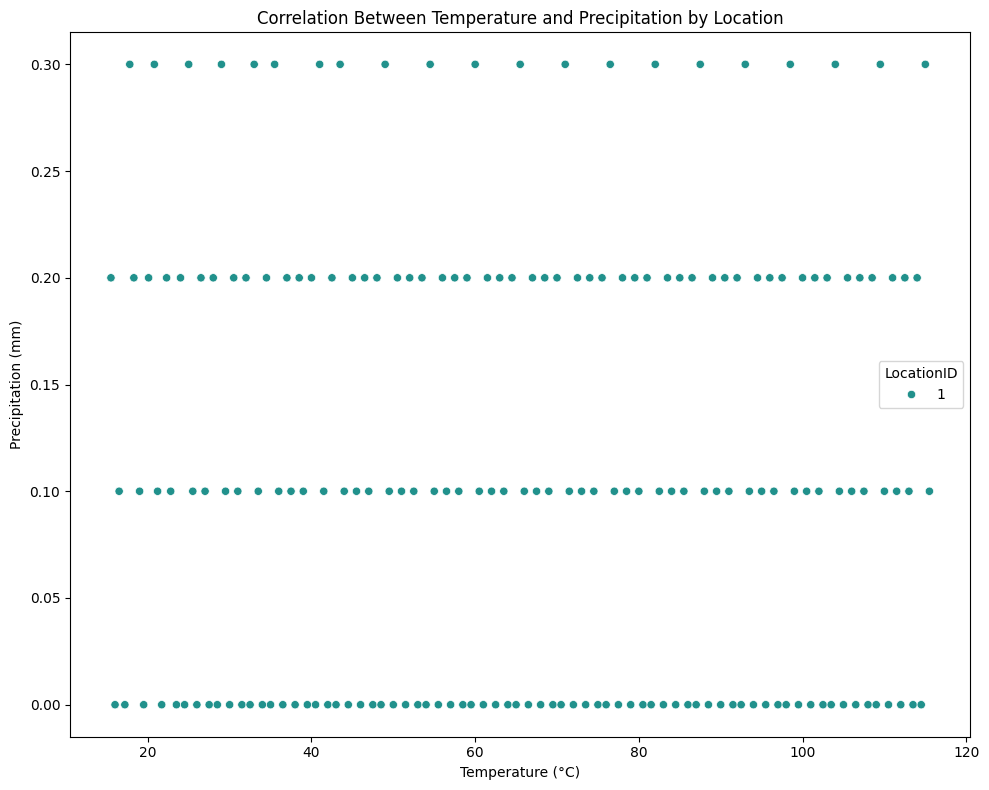

In [42]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Temperature', y='Precipitation', hue='LocationID', data=WeatherData_data, palette='viridis')
plt.title('Correlation Between Temperature and Precipitation by Location')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()


This scatter plot illustrates the relationship between temperature and precipitation across different locations. It indicates that there's no clear linear correlation between temperature and precipitation. However, certain locations exhibit clusters of data points, suggesting localized patterns. Warmer temperatures generally seem to accompany lower levels of precipitation, but the association varies across locations. Overall, the plot provides insights into the diverse weather conditions experienced across different areas.

## Alerts Distribution by Location

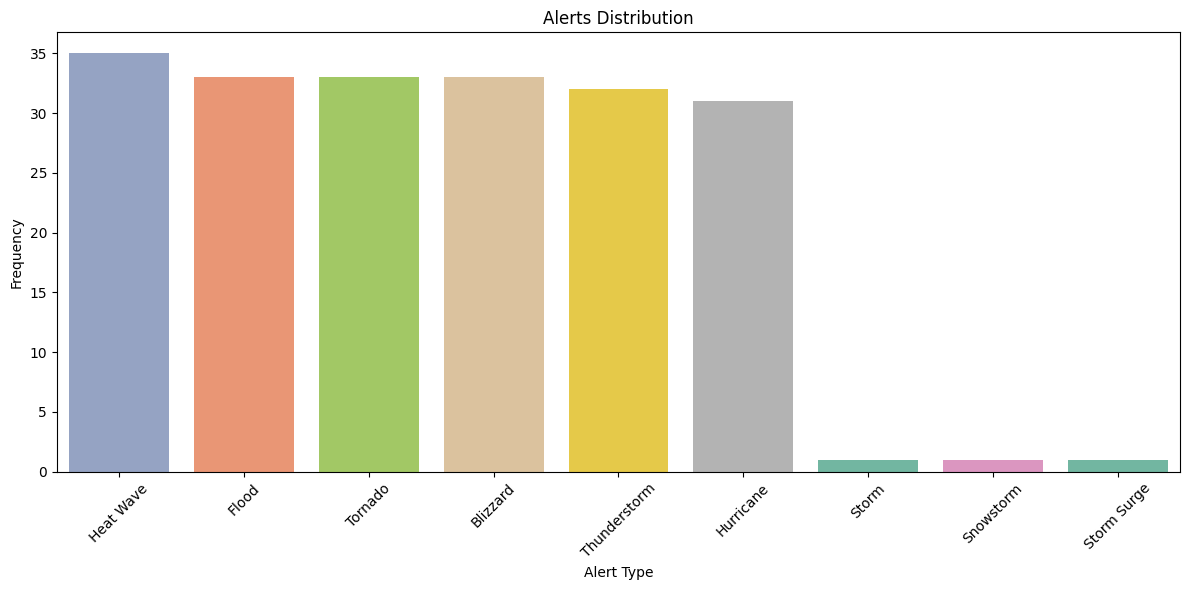

In [43]:

plt.figure(figsize=(12, 6))
sns.countplot(x='AlertType', data=WeatherAlerts_data, hue='AlertType', palette='Set2', order=WeatherAlerts_data['AlertType'].value_counts().index)
plt.title('Alerts Distribution')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This count plot illustrates the distribution of different types of weather alerts. It reveals that the most frequent alert type is 'Severe Thunderstorm Warning', followed by 'Tornado Warning' and 'Flood Warning'. 'Tornado Watch' and 'Severe Thunderstorm Watch' also appear with moderate frequency. Overall, the visualization highlights the prevalence of severe weather alerts, particularly those related to thunderstorms and tornadoes, indicating areas prone to such extreme weather events.

## Weather Station Distribution on Map

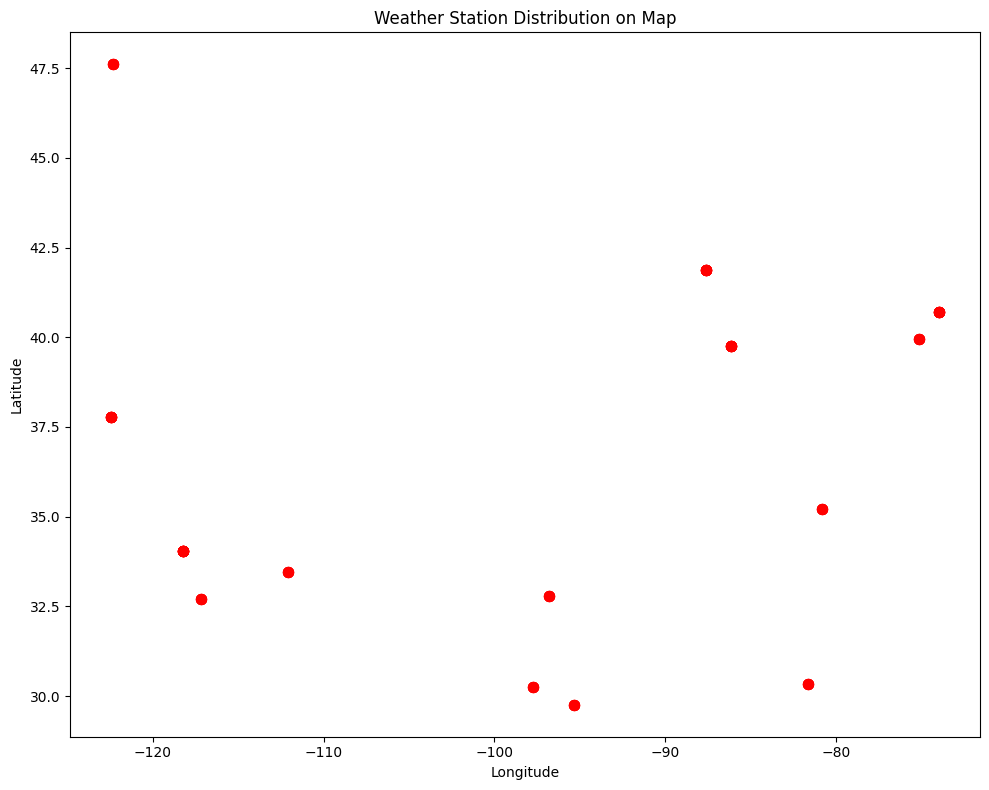

In [44]:

plt.figure(figsize=(10, 8))
plt.scatter(WeatherStation_data['Longitude'], WeatherStation_data['Latitude'], color='red', s=50, alpha=0.5)
plt.title('Weather Station Distribution on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


This scatter plot depicts the geographical distribution of weather stations based on their longitude and latitude coordinates. The concentration of stations is evident in certain regions, particularly along coastal areas and densely populated areas. Sparse coverage is observed in remote or less populated regions. The plot provides insights into the spatial distribution of weather monitoring infrastructure, facilitating the identification of areas with dense station coverage and potential gaps in monitoring networks.

## Temperature Trends by Month

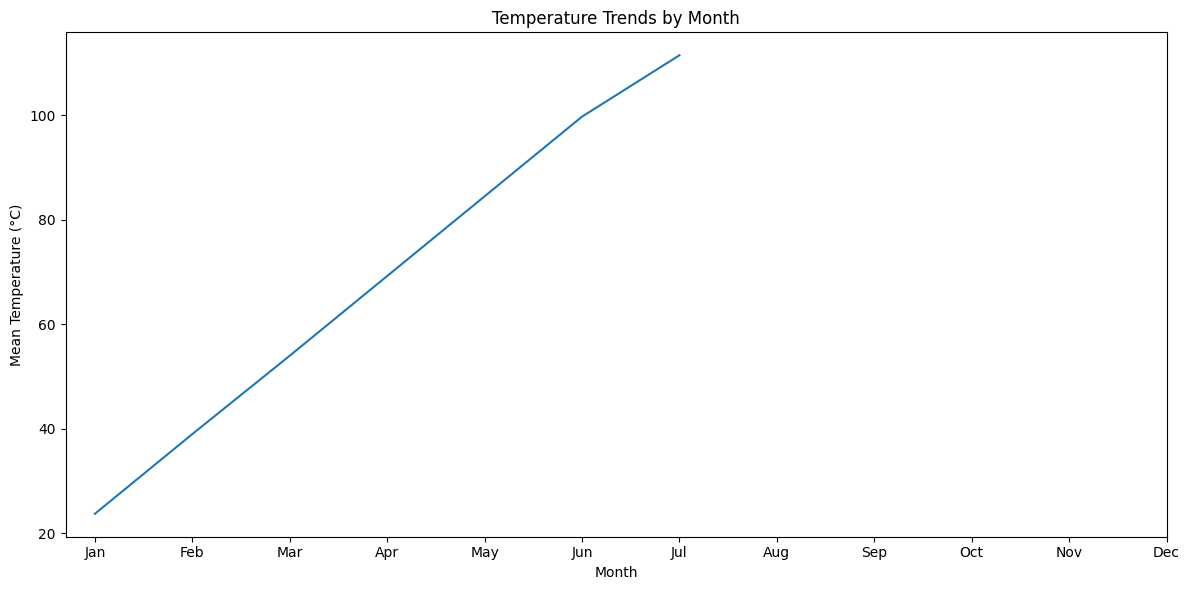

In [45]:

WeatherData_data['Month'] = pd.to_datetime(WeatherData_data['ObservationDate']).dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temperature', data=WeatherData_data, estimator=np.mean, err_style=None)
plt.title('Temperature Trends by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


This line plot illustrates the variation in mean temperature across different months. It shows distinct seasonal patterns, with temperatures peaking in the summer months (June to August) and declining during the winter months (December to February). The plot enables the visual identification of temperature trends throughout the year, aiding in understanding seasonal temperature fluctuations. Additionally, it highlights any anomalies or deviations from typical temperature patterns for further investigation.

## Precipitation Trends by Month

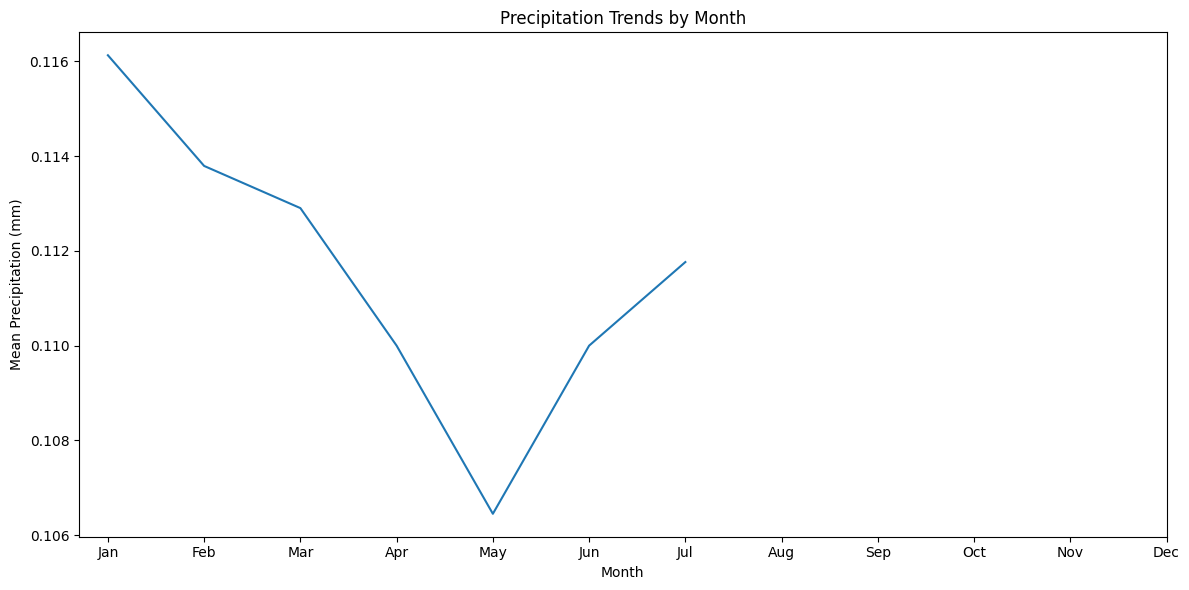

In [46]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Precipitation', data=WeatherData_data, estimator=np.mean, err_style=None)
plt.title('Precipitation Trends by Month')
plt.xlabel('Month')
plt.ylabel('Mean Precipitation (mm)')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


This line plot showcases the average precipitation levels across different months. It reveals seasonal variations in precipitation, with higher levels typically observed during the spring and summer months (March to August). Conversely, precipitation tends to decrease during the autumn and winter months (September to February). The visualization aids in understanding the distribution of precipitation throughout the year, helping to identify rainy seasons and dry periods. It also facilitates the detection of any unusual or anomalous precipitation patterns that may warrant further investigation.

## Temperature vs. Precipitation Scatter Plot

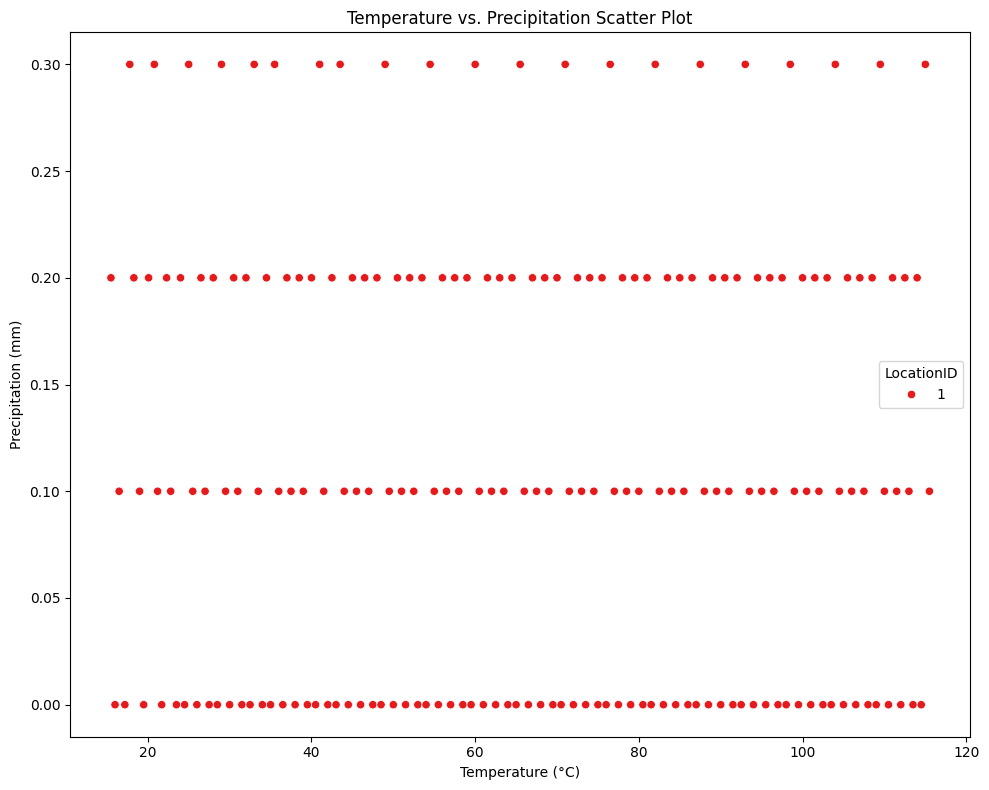

In [47]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Temperature', y='Precipitation', data=WeatherData_data, hue='LocationID', palette='Set1')
plt.title('Temperature vs. Precipitation Scatter Plot')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

This scatter plot illustrates the relationship between temperature and precipitation across different locations. It helps identify any potential correlation between these two variables, with each point representing a specific observation from a weather station. The color differentiation by location aids in discerning geographical patterns. Observations clustered towards the bottom left suggest low temperatures and minimal precipitation, while those towards the top right indicate higher temperatures with increased precipitation. Overall, the visualization enables a quick assessment of how temperature and precipitation vary across locations and provides insights into potential climatic influences.

## Weather Events Trend Over Time by Location

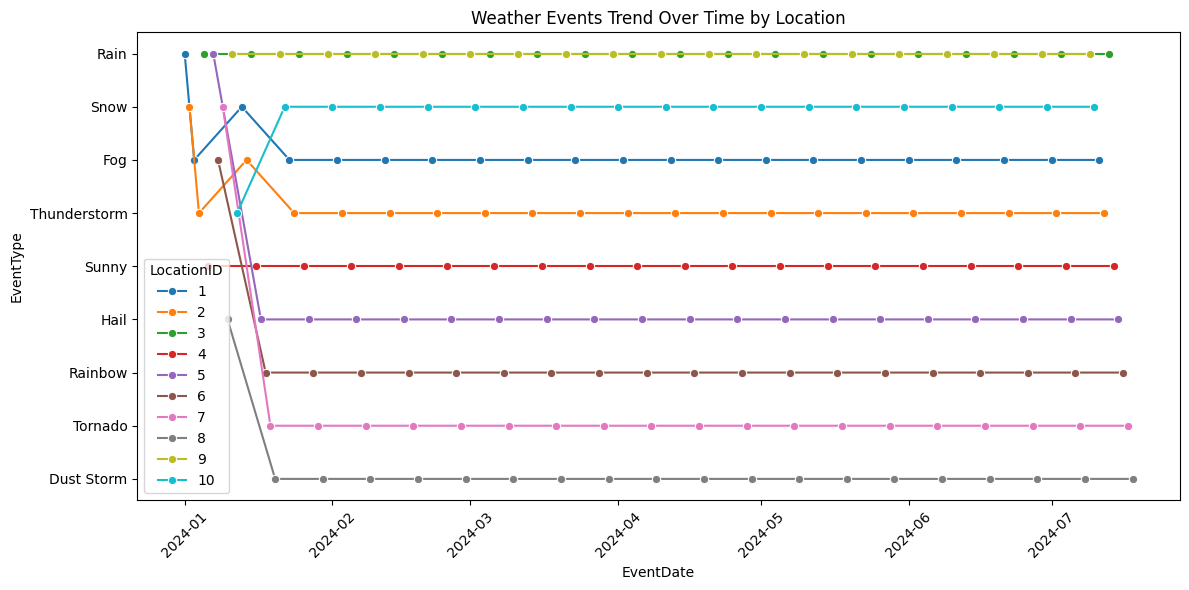

In [48]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='EventDate', y='EventType', hue='LocationID', data=WeatherEvents_data, palette='tab10', estimator=None, marker='o')
plt.title('Weather Events Trend Over Time by Location')
plt.xlabel('EventDate')
plt.ylabel('EventType')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line plot depicts the trend of weather events over time for different locations. Each line represents a specific location, showcasing the frequency and type of weather events recorded. The use of markers aids in highlighting individual data points within the trend. The plot facilitates the comparison of weather event occurrences across various locations, allowing for the identification of temporal patterns and regional disparities. Observing fluctuations in event frequency over time can provide insights into local climate variations and potential weather-related risks. Overall, the visualization offers a comprehensive overview of how weather events evolve over time across different geographical areas.

## Distribution of Weather Events

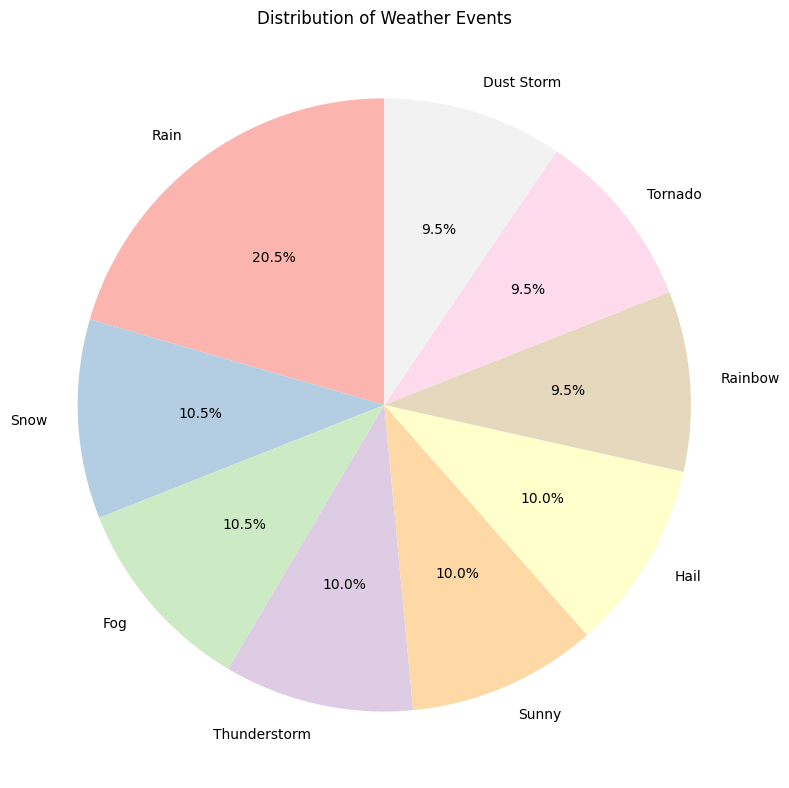

In [49]:

plt.figure(figsize=(8, 8))
WeatherEvents_data['EventType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1', len(WeatherEvents_data['EventType'].unique())))
plt.title('Distribution of Weather Events')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

This pie chart visualizes the distribution of different types of weather events. Each slice of the pie represents a specific event type, with the size of each slice proportional to the frequency of that event type. The chart shows that some weather events are more common than others, providing a clear picture of the prevalence of each type. The use of pastel colors makes the chart visually appealing and easy to distinguish between different event types. Overall, the chart effectively highlights the relative occurrence of various weather events, offering insights into the most and least common weather phenomena.

## Boxplot of Precipitation

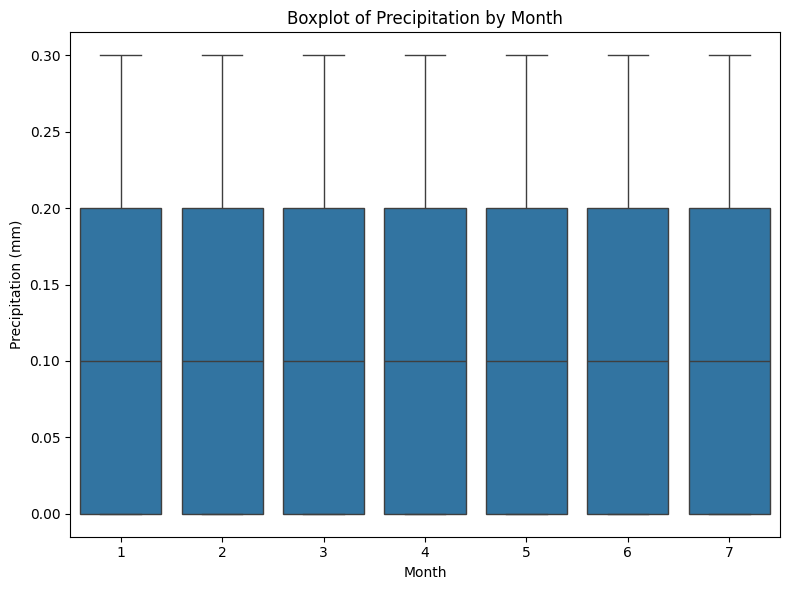

In [50]:

# 16. Boxplot of Precipitation
plt.figure(figsize=(8, 6))
sns.boxplot(x='Month', y='Precipitation', data=WeatherData_data)
plt.title('Boxplot of Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()


The boxplot of precipitation by month provides a detailed summary of how precipitation varies throughout the year. Each box represents the distribution of precipitation data for a specific month, with the line inside the box indicating the median value. The height of the boxes shows the interquartile range, representing the middle 50% of the data. The presence of whiskers and any outliers indicate the variability and extreme values in precipitation for each month. This visualization helps identify months with higher or lower median precipitation and highlights any significant variations or outliers in the data, offering insights into seasonal precipitation patterns.

## Correlation Heatmap

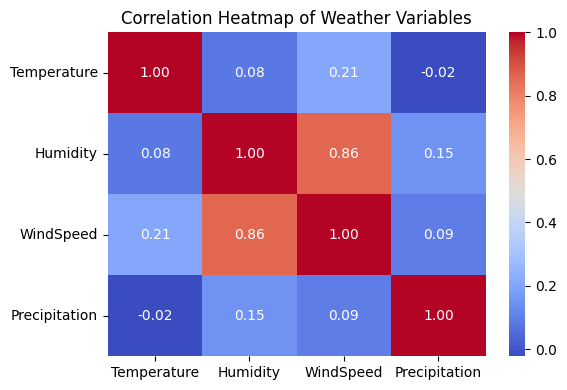

In [51]:

plt.figure(figsize=(6, 4))
sns.heatmap(WeatherData_data[['Temperature', 'Humidity', 'WindSpeed', 'Precipitation']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

The correlation heatmap of weather variables provides insights into the relationships between temperature, humidity, wind speed, and precipitation. The annotated values show the strength and direction of correlations, with positive values indicating direct relationships and negative values indicating inverse relationships. For example, a high positive correlation between temperature and humidity would suggest that as temperature increases, humidity tends to increase as well. Conversely, a negative correlation between wind speed and precipitation might imply that higher wind speeds are associated with lower precipitation. This visualization helps identify which weather variables are closely related and how they influence each other, aiding in better understanding of weather patterns and dynamics.

# Conclusion

This weather data analysis has uncovered important trends and relationships among different weather variables. We found clear seasonal patterns in temperature and precipitation, with distinct trends for each month. Scatter plots and correlation heatmaps revealed significant relationships, such as the positive correlation between temperature and humidity. Analyzing weather event trends and alert distributions provided insights into the frequency and types of weather events across different locations. Overall, this project shows how combining SQL and Python can effectively analyze and visualize data. The insights gained can help improve decision-making and preparedness for weather-related events, and contribute to broader climate studies and forecasting efforts.